# ME 454 Homework 2
## By: Christopher Tsai

Problem 1:

![](hw2_q1.jpg)

Problem 2:

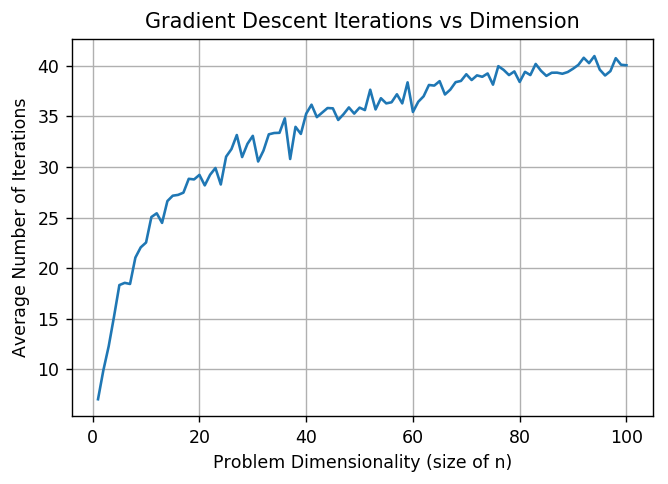

In [5]:
import numpy as np
import random 
import matplotlib.pyplot as plt

def grad_descent_iters(n):  # n = dimension of x
    iterations_list = []
    for i in range(1,101): 
        diagonal = []
        for j in range(n):
            diagonal.append(random.uniform(0.5, 1.9))
        Q = np.diag(diagonal)
        x0 = np.random.randint(-10, high=10, size=(n,1))
        x_list = [x0]
        epsilon = 0.1
        finished = False
        k = 0
        while finished == False:
            x_list.append(x_list[k] - x_list[k].T*Q)  # Df(x) = x^T*Q
            k += 1
            if np.linalg.norm(x_list[k].T*Q, ord=2) <= epsilon:
                finished = True
        iterations = len(x_list)
        iterations_list.append(iterations)
    iterations_avg = sum(iterations_list)/len(iterations_list)
    return iterations_avg

n_list = [l for l in range(1,101)]
iterations_avg_list = [grad_descent_iters(n) for n in range(1,101)]

plt.figure(dpi=125, facecolor='w')
plt.plot(n_list, iterations_avg_list)
plt.xlabel('Problem Dimensionality (size of n)')
plt.ylabel('Average Number of Iterations')
plt.grid(True)
plt.title('Gradient Descent Iterations vs Dimension')
plt.show()

Problem 3:

In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import sympy as sym
from sympy.abc import x, y

x0, y0 = sym.symbols('x0, y0')
# func = sym.Function('f')(x, y)
func = (x-x0)**2 + (x-x0)*(y-y0) + (y-y0)**2
func_mat = sym.Matrix([func])
Dfunc = func_mat.jacobian([x,y])  # 1x2
D2func = sym.hessian(func, (x,y))  # 2x2
print("Answer to first part of the question =", sym.Matrix([x0,y0]) - D2func.inv()*Dfunc.subs({x:x0,y:y0}).T, "\n")

def grad_descent_iters(n):  # n = dimension of x
    iterations_list = []
    for i in range(1,101): 
        diagonal = []
        for j in range(n):
            diagonal.append(random.uniform(0.5, 1.9))
        Q = np.diag(diagonal)
        x0 = np.random.randint(-10, high=10, size=(n,1))
        x_list = [x0]
        epsilon = 0.1
        k = 0
        iterations = len(x_list)
        iterations_list.append(iterations)
    iterations_avg = sum(iterations_list)/len(iterations_list)
    return iterations_avg

n_list = [l for l in range(1,101)]
iterations_avg_list = [grad_descent_iters(n) for n in range(1,101)]

plt.figure(dpi=125, facecolor='w')
plt.plot(n_list, iterations_avg_list)
plt.xlabel('Problem Dimensionality (size of n)')
plt.ylabel('Average Number of Iterations')
plt.grid(True)
plt.title('Gradient Descent Iterations vs Dimension')
plt.show()

Problem 4:

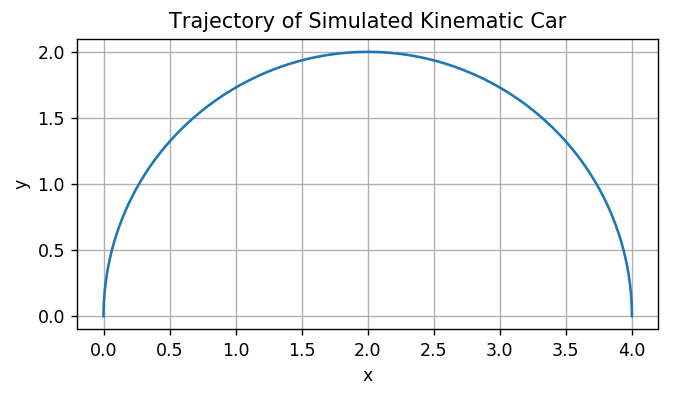

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math

def ode(t, x_vect):
    u1 = 1
    u2 = -1/2
    x, y, theta = x_vect
    xdot = np.cos(theta)*u1
    ydot = np.sin(theta)*u1
    thetadot = u2
    return xdot, ydot, thetadot

sol = solve_ivp(ode, (0,2*math.pi), (0,0,math.pi/2), t_eval=np.linspace(0,2*math.pi,100))
x, y, theta = sol.y

plt.figure(dpi=125, facecolor='w')
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Trajectory of Simulated Kinematic Car')
plt.axis("scaled")
plt.show()

Problem 5:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math
from scipy.optimize import minimize

N = 101
T = 2*math.pi

def ode(t, x_vect):
    u1 = 1
    u2 = -1/2
    x, y, theta = x_vect
    xdot = np.cos(theta)*u1
    ydot = np.sin(theta)*u1
    thetadot = u2
    return xdot, ydot, thetadot

sol = solve_ivp(ode, (0,2*math.pi), (0,0,math.pi/2), t_eval=np.linspace(0,2*math.pi,1000))

xi0 = np.concatenate((sol.y, ))

Q = np.diagflat([100, 50, 1])
P = np.diagflat([10000, 10000])


def cost(x_arr):
    x = x_arr[0]
    u = x_arr[1] 
    xd = x_arr[2] 
    t = x_arr[3]
    Q = np.array([[1, 0], [0, 0.1]])
    R = np.array([[1]])
    P1 = np.array([[1000, 0], [0, 10]])
    N = 1000
    J = 0
    for i in range(N):
        J += 0.5*np.transpose(x[i]-xd[i])*Q*(x[i]-xd[i])*(1/N) + 0.5*np.transpose(u)*R*u*(1/N)
    J += 0.5*np.transpose(x[N]-xd[N])*P1*(x[N]-xd[N])
    return J

def constraint(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

# initial guesses
n = 4
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0
x0[2] = 5.0
x0[3] = 1.0

# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1} 
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))

NameError: name 'objective' is not defined

In [ ]:
import numpy as np

Q = np.array([[1, 0], [0, 0.1]])
R = np.array([[1]])
P1 = np.array([[1000, 0], [0, 10]])

print(Q*R)
print(np.matmul(Q,P1))

In [ ]:
1/1000